In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the Dataset

In [3]:
# Load the CSV files into DataFrames
fundamentals_df = pd.read_csv('/content/drive/MyDrive/NYSE_Dataset/fundamentals.csv')
prices_split_adjusted_df = pd.read_csv('/content/drive/MyDrive/NYSE_Dataset/prices-split-adjusted.csv')
prices_df = pd.read_csv('/content/drive/MyDrive/NYSE_Dataset/prices.csv')
securities_df = pd.read_csv('/content/drive/MyDrive/NYSE_Dataset/securities.csv')


# Display the first few rows of each DataFrame

In [4]:
print("Fundamentals DataFrame:")
fundamentals_df.head()

Fundamentals DataFrame:


,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [5]:
print("\nPrices Split Adjusted DataFrame:")
prices_split_adjusted_df.head()


Prices Split Adjusted DataFrame:


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
print("\nPrices DataFrame:")
prices_df.head()


Prices DataFrame:


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [7]:
print("\nSecurities DataFrame:")
securities_df.head()


Securities DataFrame:


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


# Inspect the Data

In [8]:
print("\nFundamentals DataFrame Info:")
fundamentals_df.info()


Fundamentals DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                       

In [9]:
print("\nPrices Split Adjusted DataFrame Info:")
prices_split_adjusted_df.info()


Prices Split Adjusted DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [ ]:
print("\nPrices DataFrame Info:")
prices_df.info()


Prices DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [ ]:
print("\nSecurities DataFrame Info:")
securities_df.info()


Securities DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


# Summary statistics

In [ ]:
print("\nFundamentals DataFrame Description:")
fundamentals_df.describe()


Fundamentals DataFrame Description:


,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.000000,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,890.000000,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,514.274732,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,445.000000,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,890.000000,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,1335.000000,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,1780.000000,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


In [ ]:
print("\nPrices Split Adjusted DataFrame Description:")
prices_split_adjusted_df.describe()


Prices Split Adjusted DataFrame Description:


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
print("\nPrices DataFrame Description:")
prices_df.describe()


Prices DataFrame Description:


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
print("\nSecurities DataFrame Description:")
securities_df.describe()


Securities DataFrame Description:


,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [ ]:
prices_df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


# Sector Distribution

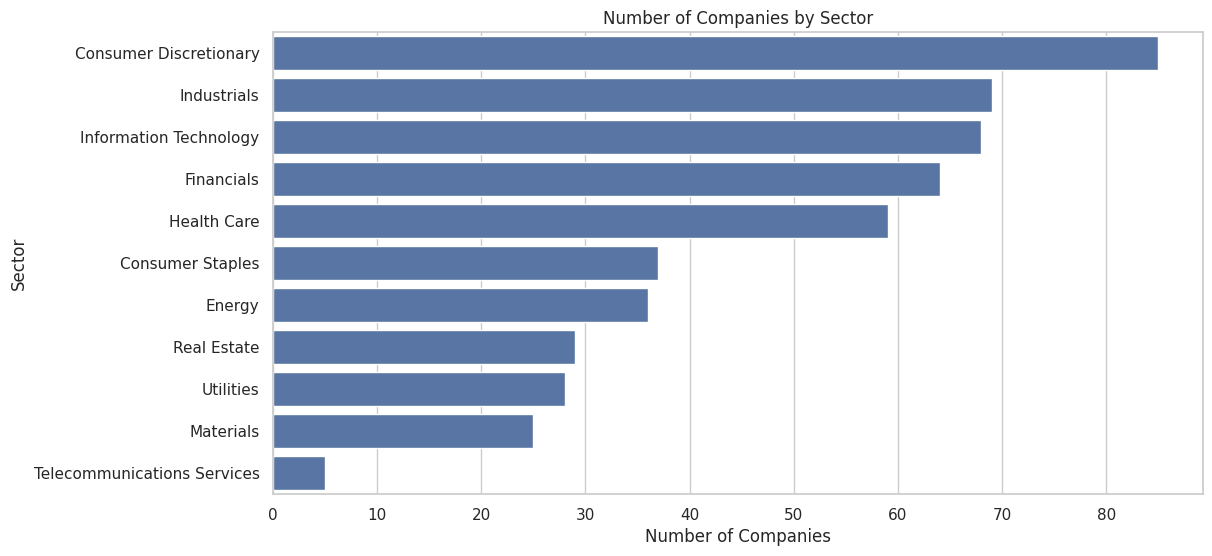

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='GICS Sector', data=securities_df, order=securities_df['GICS Sector'].value_counts().index)
plt.title('Number of Companies by Sector')
plt.xlabel('Number of Companies')
plt.ylabel('Sector')
plt.show()


# Merge Datasets

In [11]:
# Merge prices and prices_split_adjusted on 'symbol' and 'date'
merged_prices = pd.merge(prices_df, prices_split_adjusted_df, on=['symbol', 'date'], suffixes=('', '_adjusted'))

# Merge with securities on 'symbol' and 'Ticker symbol'
merged_data = pd.merge(merged_prices, securities_df, left_on='symbol', right_on='Ticker symbol')

# Merge with fundamentals on 'symbol' and 'Ticker symbol'
merged_data = pd.merge(merged_prices, fundamentals_df, left_on='symbol', right_on='Ticker Symbol')


# Distribution of Adjusted and Unadjusted Closing Prices

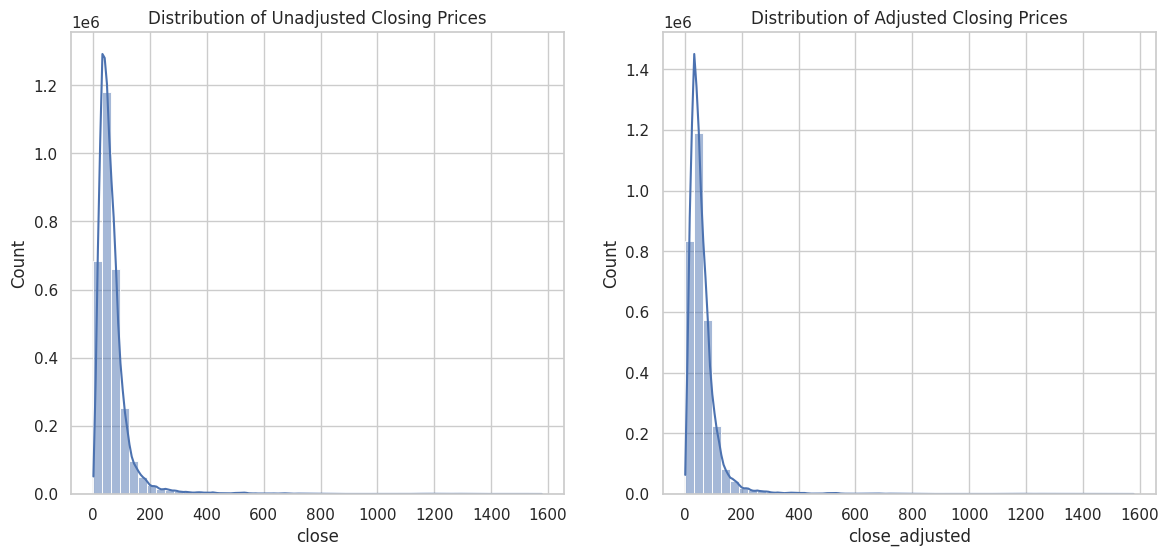

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Distribution of Adjusted and Unadjusted Closing Prices
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_data['close'], bins=50, kde=True)
plt.title('Distribution of Unadjusted Closing Prices')

plt.subplot(1, 2, 2)
sns.histplot(merged_data['close_adjusted'], bins=50, kde=True)
plt.title('Distribution of Adjusted Closing Prices')
plt.show()


# Trends Over Time for Adjusted vs. Unadjusted Prices

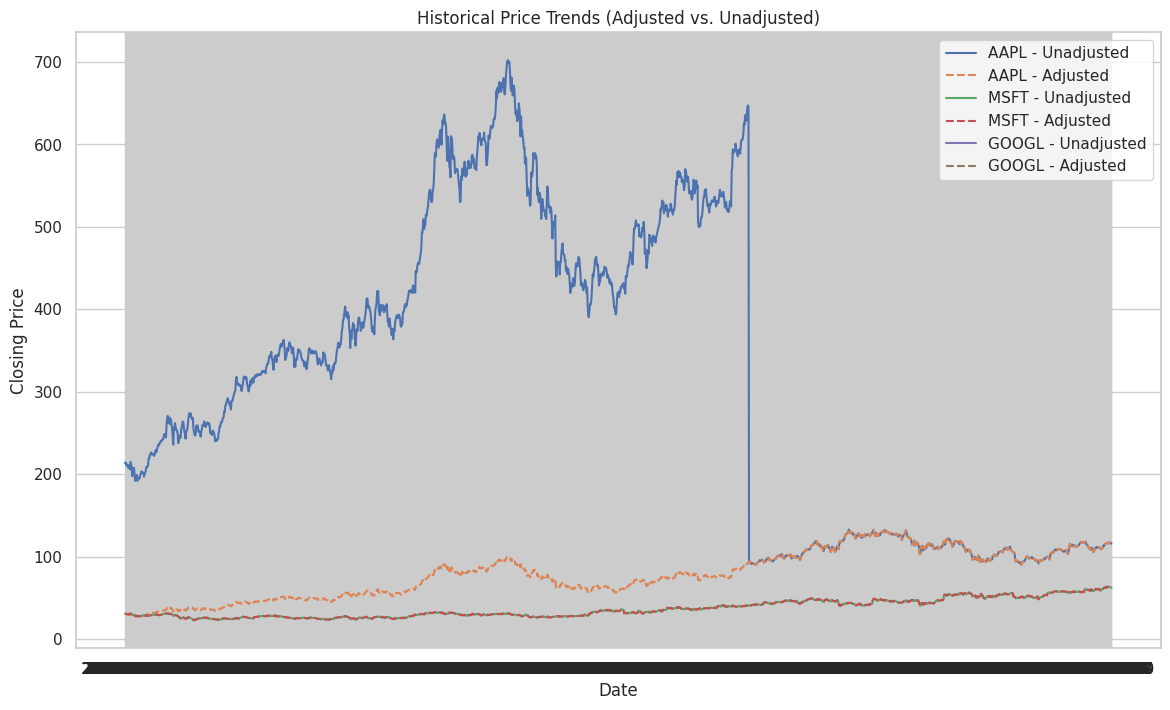

In [ ]:
# Select a few symbols for demonstration
symbols_to_plot = ['AAPL', 'MSFT', 'GOOGL']  # Example symbols
plt.figure(figsize=(14, 8))

for symbol in symbols_to_plot:
    subset = merged_data[merged_data['symbol'] == symbol]
    plt.plot(subset['date'], subset['close'], label=f'{symbol} - Unadjusted')
    plt.plot(subset['date'], subset['close_adjusted'], label=f'{symbol} - Adjusted', linestyle='--')

plt.title('Historical Price Trends (Adjusted vs. Unadjusted)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# Correlation Matrix

In [ ]:
# Exclude 'symbol' and 'date' columns from correlation calculation
cols_to_exclude = ['symbol', 'date', 'Ticker Symbol', "For Year", "Period Ending", "Unnamed: 0"]
cols_to_include = [col for col in merged_data.columns if col not in cols_to_exclude]
corr_matrix = merged_data[cols_to_include].corr()


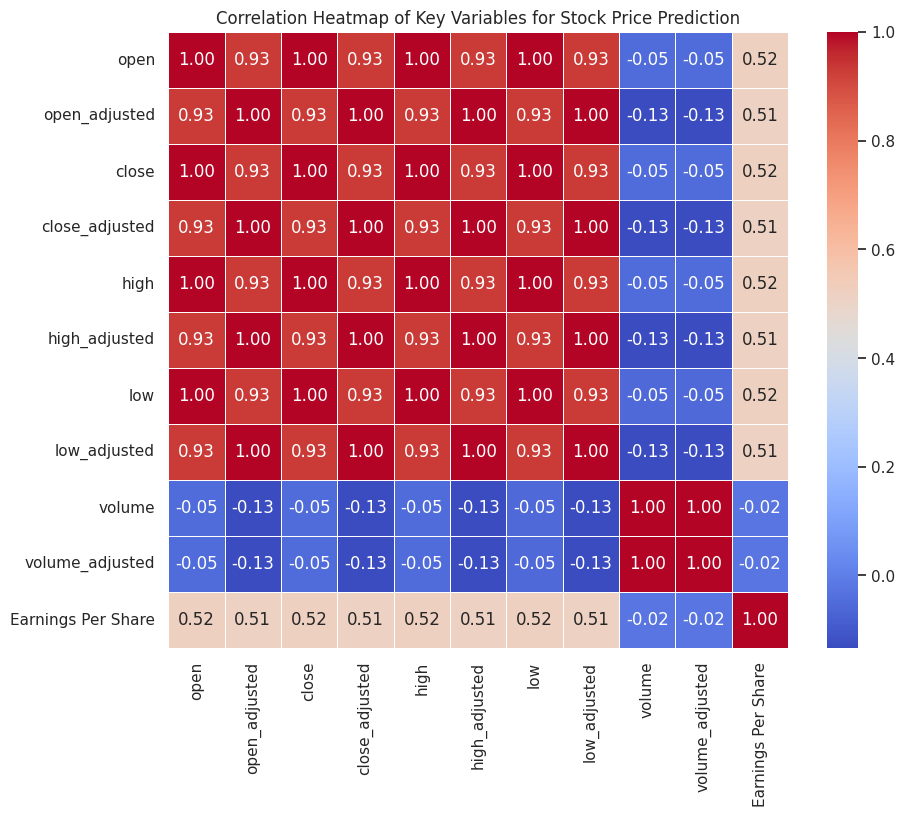

In [ ]:
# Here's a subset of relevant columns based on the correlation matrix you've shown
relevant_columns = ['open','open_adjusted','close', 'close_adjusted', 'high','high_adjusted', 'low','low_adjusted', 'volume', "volume_adjusted", 'Earnings Per Share']

# Subset the correlation matrix
relevant_corr_matrix = corr_matrix.loc[relevant_columns, relevant_columns]

# Plotting the heatmap for relevant correlations
plt.figure(figsize=(10, 8))
sns.heatmap(relevant_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Key Variables for Stock Price Prediction')
plt.show()


## Pre-processing

## Feature Selection

In [12]:
# Selecting initial important features
initial_features = [
    'date', 'symbol', 'open', 'close','low', 'high', 'volume',
    'Earnings Before Interest and Tax', 'Net Income', 'Operating Income', 'Gross Profit',
    'Profit Margin', 'Gross Margin', 'Operating Margin', 'Pre-Tax Margin', 'After Tax ROE',
    'Earnings Per Share', 'Current Ratio', 'Quick Ratio', 'Cash Ratio', 'Long-Term Debt',
    'Short-Term Debt / Current Portion of Long-Term Debt', 'Total Liabilities', 'Total Equity',
    'Net Cash Flow', 'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
    'Net Cash Flows-Investing', 'Estimated Shares Outstanding', 'Sale and Purchase of Stock'
]

# Drop rows with missing values in the selected features
df_sf = merged_data[initial_features].dropna()

# Convert 'date' column to datetime if not already done
df_sf['date'] = pd.to_datetime(df_sf['date'])

# Check the updated dataframe
df_sf

,date,symbol,open,close,low,high,volume,Earnings Before Interest and Tax,Net Income,Operating Income,...,Long-Term Debt,Short-Term Debt / Current Portion of Long-Term Debt,Total Liabilities,Total Equity,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Estimated Shares Outstanding,Sale and Purchase of Stock
0,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,-1.813000e+09,-1.876000e+09,1.480000e+08,...,7.116000e+09,1.419000e+09,2.489100e+10,-7.987000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,3.350000e+08,0.000000e+00
1,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,-1.324000e+09,-1.834000e+09,1.399000e+09,...,1.535300e+10,1.446000e+09,4.500900e+10,-2.731000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,1.630222e+08,0.000000e+00
2,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,4.099000e+09,2.882000e+09,4.249000e+09,...,1.604300e+10,1.677000e+09,4.120400e+10,2.021000e+09,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,7.169154e+08,-1.052000e+09
3,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,5.496000e+09,7.610000e+09,6.204000e+09,...,1.833000e+10,2.231000e+09,4.278000e+10,5.635000e+09,-604000000.0,6.249000e+09,-1.259000e+09,-5.594000e+09,6.681299e+08,-3.846000e+09
4,2010-01-05,AAL,4.790000,5.310000,4.710000,5.370000,25212000.0,-1.813000e+09,-1.876000e+09,1.480000e+08,...,7.116000e+09,1.419000e+09,2.489100e+10,-7.987000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,3.350000e+08,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025900,2016-12-23,CSRA,31.930000,31.889999,31.520000,31.930000,371400.0,2.025640e+08,1.029220e+08,1.873430e+08,...,2.764854e+09,1.701910e+08,4.781754e+09,6.454600e+07,125037000.0,5.535160e+08,1.176840e+09,-1.605319e+09,1.905963e+08,-7.473300e+07
3025902,2016-12-27,CSRA,31.940001,32.020000,31.920000,32.110001,892500.0,2.025640e+08,1.029220e+08,1.873430e+08,...,2.764854e+09,1.701910e+08,4.781754e+09,6.454600e+07,125037000.0,5.535160e+08,1.176840e+09,-1.605319e+09,1.905963e+08,-7.473300e+07
3025904,2016-12-28,CSRA,31.980000,31.690001,31.570000,32.220001,816800.0,2.025640e+08,1.029220e+08,1.873430e+08,...,2.764854e+09,1.701910e+08,4.781754e+09,6.454600e+07,125037000.0,5.535160e+08,1.176840e+09,-1.605319e+09,1.905963e+08,-7.473300e+07
3025906,2016-12-29,CSRA,31.549999,31.940001,31.549999,31.980000,501600.0,2.025640e+08,1.029220e+08,1.873430e+08,...,2.764854e+09,1.701910e+08,4.781754e+09,6.454600e+07,125037000.0,5.535160e+08,1.176840e+09,-1.605319e+09,1.905963e+08,-7.473300e+07


In [15]:
# Resample to monthly data for each symbol
df_monthly = df_sf.groupby(['symbol', pd.Grouper(key='date', freq='M')]).agg({
    'open': 'first',
    'close': 'last',
    'low': 'min',
    'high': 'max',
    'volume': 'sum',
    'Earnings Before Interest and Tax': 'mean',
    'Net Income': 'mean',
    'Operating Income': 'mean',
    'Gross Profit': 'mean',
    'Profit Margin': 'mean',
    'Gross Margin': 'mean',
    'Operating Margin': 'mean',
    'Pre-Tax Margin': 'mean',
    'After Tax ROE': 'mean',
    'Earnings Per Share': 'mean',
    'Current Ratio': 'mean',
    'Quick Ratio': 'mean',
    'Cash Ratio': 'mean',
    'Long-Term Debt': 'mean',
    'Short-Term Debt / Current Portion of Long-Term Debt': 'mean',
    'Total Liabilities': 'mean',
    'Total Equity': 'mean',
    'Net Cash Flow': 'mean',
    'Net Cash Flow-Operating': 'mean',
    'Net Cash Flows-Financing': 'mean',
    'Net Cash Flows-Investing': 'mean',
    'Estimated Shares Outstanding': 'mean',
    'Sale and Purchase of Stock': 'mean'
}).reset_index()

df_monthly


,symbol,date,open,close,low,high,volume,Earnings Before Interest and Tax,Net Income,Operating Income,...,Long-Term Debt,Short-Term Debt / Current Portion of Long-Term Debt,Total Liabilities,Total Equity,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Estimated Shares Outstanding,Sale and Purchase of Stock
0,AAL,2010-01-31,4.840000,5.310000,4.470000,5.960000,1.049924e+09,1.614500e+09,1.695500e+09,3.000000e+09,...,1.421050e+10,1.693250e+09,3.847100e+10,-7.655000e+08,26750000.0,2.822250e+09,6.770000e+08,-3.472500e+09,4.707669e+08,-1.224500e+09
1,AAL,2010-02-28,5.430000,7.330000,5.350000,7.400000,9.228604e+08,1.614500e+09,1.695500e+09,3.000000e+09,...,1.421050e+10,1.693250e+09,3.847100e+10,-7.655000e+08,26750000.0,2.822250e+09,6.770000e+08,-3.472500e+09,4.707669e+08,-1.224500e+09
2,AAL,2010-03-31,7.410000,7.350000,6.810000,8.170000,6.952804e+08,1.614500e+09,1.695500e+09,3.000000e+09,...,1.421050e+10,1.693250e+09,3.847100e+10,-7.655000e+08,26750000.0,2.822250e+09,6.770000e+08,-3.472500e+09,4.707669e+08,-1.224500e+09
3,AAL,2010-04-30,7.370000,7.070000,6.270000,7.870000,1.306894e+09,1.614500e+09,1.695500e+09,3.000000e+09,...,1.421050e+10,1.693250e+09,3.847100e+10,-7.655000e+08,26750000.0,2.822250e+09,6.770000e+08,-3.472500e+09,4.707669e+08,-1.224500e+09
4,AAL,2010-05-31,7.210000,8.830000,5.700000,8.970000,1.048033e+09,1.614500e+09,1.695500e+09,3.000000e+09,...,1.421050e+10,1.693250e+09,3.847100e+10,-7.655000e+08,26750000.0,2.822250e+09,6.770000e+08,-3.472500e+09,4.707669e+08,-1.224500e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29216,ZTS,2016-08-31,50.470001,51.099998,49.290001,52.639999,2.439360e+08,8.030000e+08,4.753333e+08,8.293333e+08,...,3.966000e+09,1.423333e+08,5.913333e+09,1.106333e+09,279000000.0,6.570000e+08,1.336667e+08,-4.936667e+08,5.000418e+08,-6.333333e+07
29217,ZTS,2016-09-30,51.150002,52.009998,50.070000,52.169998,2.249505e+08,8.030000e+08,4.753333e+08,8.293333e+08,...,3.966000e+09,1.423333e+08,5.913333e+09,1.106333e+09,279000000.0,6.570000e+08,1.336667e+08,-4.936667e+08,5.000418e+08,-6.333333e+07
29218,ZTS,2016-10-31,51.759998,47.799999,47.759998,53.139999,1.936863e+08,8.030000e+08,4.753333e+08,8.293333e+08,...,3.966000e+09,1.423333e+08,5.913333e+09,1.106333e+09,279000000.0,6.570000e+08,1.336667e+08,-4.936667e+08,5.000418e+08,-6.333333e+07
29219,ZTS,2016-11-30,47.610001,50.380001,46.860001,52.189999,2.746035e+08,8.030000e+08,4.753333e+08,8.293333e+08,...,3.966000e+09,1.423333e+08,5.913333e+09,1.106333e+09,279000000.0,6.570000e+08,1.336667e+08,-4.936667e+08,5.000418e+08,-6.333333e+07


In [16]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=eaca26b3fd9c6aa35ba05094e78ccf3027adf6f0220b678e9e563751ca744268
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [17]:
import ta
from ta.volatility import AverageTrueRange, BollingerBands
from ta.trend import MACD, ADXIndicator
from ta.momentum import RSIIndicator, StochasticOscillator, ROCIndicator
from ta.trend import IchimokuIndicator
from ta.volume import ChaikinMoneyFlowIndicator
from ta.volume import OnBalanceVolumeIndicator
from ta.momentum import WilliamsRIndicator
from ta.trend import CCIIndicator


In [18]:
# Sort the data by date for each symbol
df_monthly = df_monthly.sort_values(by=['symbol', 'date'])

# Initialize new columns for technical indicators
df_monthly['RSI'] = df_monthly.groupby('symbol')['close'].transform(lambda x: RSIIndicator(x, window=14).rsi())
df_monthly['MV20'] = df_monthly.groupby('symbol')['close'].transform(lambda x: x.rolling(window=20).mean())
df_monthly['MV50'] = df_monthly.groupby('symbol')['close'].transform(lambda x: x.rolling(window=50).mean())
df_monthly['MV200'] = df_monthly.groupby('symbol')['close'].transform(lambda x: x.rolling(window=200).mean())


In [21]:
macd = df_monthly.groupby('symbol')['close'].apply(lambda x: MACD(x).macd())
df_monthly['MACD'] = macd.reset_index(level=0, drop=True)

In [20]:
# Manually calculate the Accumulation/Distribution (AD) line
def calculate_ad(high, low, close, volume):
    clv = ((close - low) - (high - close)) / (high - low)
    clv = clv.fillna(0)  # Fill NaN values
    ad = (clv * volume).cumsum()
    return ad

df_monthly['AD'] = df_monthly.groupby('symbol').apply(lambda x: calculate_ad(x['high'], x['low'], x['close'], x['volume'])).reset_index(level=0, drop=True)


In [22]:
# Bollinger Bands
bollinger = df_monthly.groupby('symbol')['close'].apply(lambda x: BollingerBands(close=x).bollinger_mavg())
df_monthly['Bollinger_MAVG'] = bollinger.reset_index(level=0, drop=True)
df_monthly['Bollinger_High'] = df_monthly.groupby('symbol')['close'].transform(lambda x: BollingerBands(close=x).bollinger_hband())
df_monthly['Bollinger_Low'] = df_monthly.groupby('symbol')['close'].transform(lambda x: BollingerBands(close=x).bollinger_lband())


In [23]:
# Stochastic Oscillator
stochastic = df_monthly.groupby('symbol').apply(lambda x: StochasticOscillator(x['high'], x['low'], x['close']).stoch())
df_monthly['Stochastic'] = stochastic.reset_index(level=0, drop=True)

# Rate Of Change (ROC)
roc = df_monthly.groupby('symbol')['close'].apply(lambda x: ROCIndicator(x).roc())
df_monthly['ROC'] = roc.reset_index(level=0, drop=True)


In [27]:
atr = df_monthly.groupby('symbol').apply(lambda x: AverageTrueRange(x['high'], x['low'], x['close']).average_true_range())
df_monthly['ATR'] = atr.reset_index(level=0, drop=True)


In [28]:
cci = df_monthly.groupby('symbol').apply(lambda x: CCIIndicator(x['high'], x['low'], x['close']).cci())
df_monthly['CCI'] = cci.reset_index(level=0, drop=True)

In [29]:
williams_r = df_monthly.groupby('symbol').apply(lambda x: WilliamsRIndicator(x['high'], x['low'], x['close']).williams_r())
df_monthly['Williams %R'] = williams_r.reset_index(level=0, drop=True)

In [30]:
obv = df_monthly.groupby('symbol').apply(lambda x: OnBalanceVolumeIndicator(x['close'], x['volume']).on_balance_volume())
df_monthly['OBV'] = obv.reset_index(level=0, drop=True)

In [31]:
cmf = df_monthly.groupby('symbol').apply(lambda x: ChaikinMoneyFlowIndicator(x['high'], x['low'], x['close'], x['volume']).chaikin_money_flow())
df_monthly['CMF'] = cmf.reset_index(level=0, drop=True)

In [32]:
ichimoku_a = df_monthly.groupby('symbol').apply(lambda x: IchimokuIndicator(high=x['high'], low=x['low']).ichimoku_a())
df_monthly['Ichimoku_A'] = ichimoku_a.reset_index(level=0, drop=True)

ichimoku_b = df_monthly.groupby('symbol').apply(lambda x: IchimokuIndicator(high=x['high'], low=x['low']).ichimoku_b())
df_monthly['Ichimoku_B'] = ichimoku_b.reset_index(level=0, drop=True)

In [34]:
# df_monthly.to_csv('/content/drive/MyDrive/samreen/df_monthly.csv', index=False)

In [10]:
df_monthly = pd.read_csv('/content/drive/MyDrive/samreen/df_monthly.csv')

In [16]:
from sklearn.preprocessing import MinMaxScaler

features = ['open', 'low', 'high', 'volume',
       'Earnings Before Interest and Tax', 'Net Income', 'Operating Income',
       'Gross Profit', 'Profit Margin', 'Gross Margin', 'Operating Margin',
       'Pre-Tax Margin', 'After Tax ROE', 'Earnings Per Share',
       'Current Ratio', 'Quick Ratio', 'Cash Ratio', 'Long-Term Debt',
       'Short-Term Debt / Current Portion of Long-Term Debt',
       'Total Liabilities', 'Total Equity', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Estimated Shares Outstanding',
       'Sale and Purchase of Stock', 'RSI', 'MV20', 'MV50', 'MV200', 'MACD',
        'AD', 'Bollinger_MAVG', 'Bollinger_High', 'Bollinger_Low',
       'Stochastic', 'ROC', 'ATR', 'CCI', 'Williams %R', 'OBV', 'CMF',
       'Ichimoku_A', 'Ichimoku_B']

target = 'close'

scaler = MinMaxScaler()

df_monthly[features] = scaler.fit_transform(df_monthly[features])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [11]:

# Encode the 'symbol' column
label_encoder = LabelEncoder()
df_monthly['symbol_encoded'] = label_encoder.fit_transform(df_monthly['symbol'])

df_monthly.drop(columns=['symbol', 'date'], inplace=True)

In [17]:
# prompt: use forward and backward fill method, remove the columns which have null values

# Forward fill to propagate the last valid observation forward
df_monthly.fillna(method='ffill', inplace=True)

# Backward fill to fill any remaining missing values
df_monthly.fillna(method='bfill', inplace=True)

# Check if there are still any null values and drop columns if necessary
null_columns = df_monthly.columns[df_monthly.isnull().any()]
if null_columns.any():
    df_monthly.drop(columns=null_columns, inplace=True)
    print("Dropped columns with null values:", null_columns.tolist())
else:
    print("No columns with null values found after filling.")


Dropped columns with null values: ['MV200']


<ipython-input-17-5cce76e035ee>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_monthly.fillna(method='ffill', inplace=True)
<ipython-input-17-5cce76e035ee>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_monthly.fillna(method='bfill', inplace=True)


In [70]:
import numpy as np

# Define features (X) and target (y)
X = np.array(df_monthly.drop(columns=['close'], axis = 1))
y = np.array(df_monthly['close'])


## Make rolling windows for LSTM and GRU

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
import os

# Define the rolling window sizes
window_sizes = [1, 5, 10, 20, 30, 50, 60 , 70]

# Function to create rolling window data
def create_rolling_window_data(X, y, window_size):
    X_roll = []
    y_roll = []
    for i in range(len(X) - window_size):
        X_roll.append(X[i:i+window_size])
        y_roll.append(y[i+window_size])
    return np.array(X_roll), np.array(y_roll)

# Path to save the processed data
save_path = '/content/drive/MyDrive/samreen/'

# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Loop through each window size, create rolling window data, and perform train-test-validation splits
for W in window_sizes:
    print(f"Processing window size: {W}")

    # Create rolling window data
    X_roll, y_roll = create_rolling_window_data(X, y, W)

    # Train-test split (using the last part for testing as per description)
    split_idx = int(len(X_roll) * 0.8)
    X_train, X_test = X_roll[:split_idx], X_roll[split_idx:]
    y_train, y_test = y_roll[:split_idx], y_roll[split_idx:]

    # Reshape data for LSTM (samples, timesteps, features)
    X_train = X_train.reshape(X_train.shape[0], W, X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], W, X_test.shape[2])

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Save the datasets
    np.save(os.path.join(save_path, f'X_train_W{W}.npy'), X_train)
    np.save(os.path.join(save_path, f'X_val_W{W}.npy'), X_val)
    np.save(os.path.join(save_path, f'X_test_W{W}.npy'), X_test)
    np.save(os.path.join(save_path, f'y_train_W{W}.npy'), y_train)
    np.save(os.path.join(save_path, f'y_val_W{W}.npy'), y_val)
    np.save(os.path.join(save_path, f'y_test_W{W}.npy'), y_test)

    print(f"Window size {W}:")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    print()


Processing window size: 1
Window size 1:
X_train shape: (18700, 1, 45), y_train shape: (18700,)
X_val shape: (4676, 1, 45), y_val shape: (4676,)
X_test shape: (5844, 1, 45), y_test shape: (5844,)

Processing window size: 5
Window size 5:
X_train shape: (18697, 5, 45), y_train shape: (18697,)
X_val shape: (4675, 5, 45), y_val shape: (4675,)
X_test shape: (5844, 5, 45), y_test shape: (5844,)

Processing window size: 10
Window size 10:
X_train shape: (18694, 10, 45), y_train shape: (18694,)
X_val shape: (4674, 10, 45), y_val shape: (4674,)
X_test shape: (5843, 10, 45), y_test shape: (5843,)

Processing window size: 20
Window size 20:
X_train shape: (18688, 20, 45), y_train shape: (18688,)
X_val shape: (4672, 20, 45), y_val shape: (4672,)
X_test shape: (5841, 20, 45), y_test shape: (5841,)

Processing window size: 30
Window size 30:
X_train shape: (18681, 30, 45), y_train shape: (18681,)
X_val shape: (4671, 30, 45), y_val shape: (4671,)
X_test shape: (5839, 30, 45), y_test shape: (5839,)



# LSTM to predict close price

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ParameterGrid
import numpy as np
import os

# Define the function to create the model
def create_model(optimizer='adam', learning_rate=0.001, input_shape=(1, 1)):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dense(1))  # Output layer

    # Compile the model
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)


    model.compile(optimizer=opt, loss='mean_squared_error')
    return model

In [75]:


# Define parameter grid for hyperparameter tuning
param_grid = {
    'optimizer': ['adam'],
    'learning_rate': [0.0001]
}

# Define the rolling window sizes
window_sizes = [1, 5, 10, 20, 30, 50, 60 , 70]

# Path to save the best models
best_model_path = '/content/drive/MyDrive/samreen/lstm_model'
data_path = '/content/drive/MyDrive/samreen'
os.makedirs(best_model_path, exist_ok=True)

# Iterate through each window size
for W in window_sizes:
    print(f"Processing window size: {W}")

    # Load the data
    X_train = np.load(os.path.join(data_path, f'X_train_W{W}.npy'))
    X_val = np.load(os.path.join(data_path, f'X_val_W{W}.npy'))
    X_test = np.load(os.path.join(data_path, f'X_test_W{W}.npy'))
    y_train = np.load(os.path.join(data_path, f'y_train_W{W}.npy'))
    y_val = np.load(os.path.join(data_path, f'y_val_W{W}.npy'))
    y_test = np.load(os.path.join(data_path, f'y_test_W{W}.npy'))

    # Define the number of features
    num_features = X_train.shape[2]
    input_shape = (X_train.shape[1], num_features)

    best_val_loss = float('inf')
    best_model = None
    best_params = None

    # Iterate through the parameter grid
    for params in ParameterGrid(param_grid):
        optimizer = params['optimizer']
        learning_rate = params['learning_rate']

        # Build the model
        model = create_model(
            optimizer=optimizer,
            learning_rate=learning_rate,
            input_shape=input_shape
        )

        # EarlyStopping callback
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )

        # Train the model
        history = model.fit(
            X_train, y_train,
            epochs=200,
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping],
            verbose=1
        )

        # Get the validation loss of the best epoch
        val_loss = min(history.history['val_loss'])

        # Update the best model if the current one is better
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model
            best_params = params

    # Save the best model
    path = os.path.join(best_model_path, f'best_model_W{W}.h5')
    best_model.save(path)

    print(f"Best model for window size {W} saved with val_loss={best_val_loss}.")
    print(f"Best parameters: {best_params}")

    # Evaluate the best model on the test data
    test_loss = best_model.evaluate(X_test, y_test)
    print(f"Test loss for window size {W}: {test_loss}")
    print()


Processing window size: 1
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


585/585 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 12653.5537 - val_loss: 12619.2666
Epoch 2/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 11574.5264 - val_loss: 11994.0283
Epoch 3/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 10309.1816 - val_loss: 11538.6104
Epoch 4/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9931.3340 - val_loss: 11148.7861
Epoch 5/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9392.0732 - val_loss: 10808.0361
Epoch 6/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9014.9307 - val_loss: 10508.3564
Epoch 7/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8448.9766 - val_loss: 10246.2168
Epoch 8/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8470.5234 - val_loss: 10017.5898
Epoch 9/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7938.5117 - val_loss: 9819.8711
Epoch 10/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8475.0469 - val_loss: 9652.8604
Epoch 11/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8024.468

Best model for window size 1 saved with val_loss=2306.48486328125.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 153.1429
Test loss for window size 1: 111.54064178466797

Processing window size: 5
Epoch 1/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 11618.2920 - val_loss: 11746.5449
Epoch 2/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 10412.9658 - val_loss: 11156.6045
Epoch 3/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9376.1562 - val_loss: 10673.3174
Epoch 4/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8855.5234 - val_loss: 10272.0332
Epoch 5/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9607.6387 - val_loss: 9937.4648
Epoch 6/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7936.7642 - val_loss: 9659.1475
Epoch 7/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8917.0049 - val_loss: 9434.7080
Epoch 8/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8134.3994 - val_lo

Best model for window size 5 saved with val_loss=1499.2796630859375.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 146.9828
Test loss for window size 5: 109.77196502685547

Processing window size: 10
Epoch 1/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 12912.3428 - val_loss: 10209.5586
Epoch 2/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 11495.3037 - val_loss: 9593.1250
Epoch 3/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 11146.5107 - val_loss: 9094.4404
Epoch 4/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9207.8496 - val_loss: 8671.2803
Epoch 5/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 10066.2236 - val_loss: 8308.4805
Epoch 6/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9421.4912 - val_loss: 8002.4697
Epoch 7/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8095.3198 - val_loss: 7750.7153
Epoch 8/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8533.2471 - val_

Best model for window size 10 saved with val_loss=7023.99169921875.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1707.3512
Test loss for window size 10: 1575.6998291015625

Processing window size: 20
Epoch 1/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 12028.0107 - val_loss: 11577.3174
Epoch 2/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 11515.9697 - val_loss: 10943.6426
Epoch 3/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 10343.8311 - val_loss: 10423.9365
Epoch 4/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 10161.8262 - val_loss: 9987.7744
Epoch 5/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9434.8340 - val_loss: 9616.4033
Epoch 6/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8958.5811 - val_loss: 9306.4873
Epoch 7/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7913.9731 - val_loss: 9048.7344
Epoch 8/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8500.9023 - v

Best model for window size 20 saved with val_loss=1839.5081787109375.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177.9683
Test loss for window size 20: 124.60013580322266

Processing window size: 30
Epoch 1/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 12660.7285 - val_loss: 10217.3633
Epoch 2/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 10868.0264 - val_loss: 9618.9443
Epoch 3/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 11106.2734 - val_loss: 9128.7373
Epoch 4/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 10631.2373 - val_loss: 8713.4688
Epoch 5/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 9787.4961 - val_loss: 8361.5273
Epoch 6/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 9540.8926 - val_loss: 8067.0425
Epoch 7/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 8977.6523 - val_loss: 7824.1592
Epoch 8/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 8868.8379 - va

Best model for window size 30 saved with val_loss=1209.784912109375.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 158.7112
Test loss for window size 30: 121.97665405273438

Processing window size: 50
Epoch 1/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 12594.1299 - val_loss: 10239.7256
Epoch 2/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 11865.1943 - val_loss: 9658.6396
Epoch 3/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 9583.8291 - val_loss: 9180.4961
Epoch 4/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 9821.5566 - val_loss: 8780.6660
Epoch 5/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 9710.9902 - val_loss: 8446.1377
Epoch 6/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 9066.8145 - val_loss: 8164.4277
Epoch 7/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 8302.6758 - val_loss: 7927.9546
Epoch 8/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 8457.1650 - val_l

Best model for window size 50 saved with val_loss=1297.1539306640625.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 121.2968
Test loss for window size 50: 230.9521026611328

Processing window size: 60
Epoch 1/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 12900.6562 - val_loss: 11210.7393
Epoch 2/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 11341.2158 - val_loss: 10594.0137
Epoch 3/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 10070.6729 - val_loss: 10077.8018
Epoch 4/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 10123.8350 - val_loss: 9648.6406
Epoch 5/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 9819.8164 - val_loss: 9289.4072
Epoch 6/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 9451.5713 - val_loss: 8987.6533
Epoch 7/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 8474.2334 - val_loss: 8738.6445
Epoch 8/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 8708.5996 - v

Best model for window size 60 saved with val_loss=1517.1617431640625.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 120.6386
Test loss for window size 60: 246.4072265625

Processing window size: 70
Epoch 1/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 13025.6367 - val_loss: 10008.0508
Epoch 2/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 11296.2646 - val_loss: 9405.1846
Epoch 3/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 10093.0674 - val_loss: 8912.4004
Epoch 4/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 10861.3516 - val_loss: 8500.5400
Epoch 5/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 9678.9902 - val_loss: 8151.4546
Epoch 6/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 9191.7803 - val_loss: 7859.8594
Epoch 7/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 9938.0713 - val_loss: 7622.4526
Epoch 8/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 9003.8252 - val_lo

Best model for window size 70 saved with val_loss=1025.2099609375.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 147.6792
Test loss for window size 70: 217.57296752929688



## Load the save model to select the best one based on the matrics

In [82]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the rolling window sizes
window_sizes = [1, 5, 10, 20, 30, 50, 60, 70]

# Path to the saved models
best_model_path = '/content/drive/MyDrive/samreen/lstm_model'
data_path = '/content/drive/MyDrive/samreen'

best_global_val_loss = float('inf')
best_global_model = None
best_global_window_size = None

# Iterate through each window size
for W in window_sizes:
    print(f"Evaluating model for window size: {W}")

    # Load the data
    X_test = np.load(os.path.join(data_path, f'X_test_W{W}.npy'))
    y_test = np.load(os.path.join(data_path, f'y_test_W{W}.npy'))

    # Load the model
    model_path = os.path.join(best_model_path, f'best_model_W{W}.h5')
    model = load_model(model_path)

    # Ensure the model is compiled with necessary metrics
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    # Evaluate the model on the test data
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Window size {W} -- Test MAE: {mae}, Test RMSE: {rmse}, Test R-squared: {r2}, Validation Loss: {loss}")

    if loss < best_global_val_loss:
        best_global_val_loss = loss
        best_global_model = model
        best_global_window_size = W

print(f"Best overall model found for window size {best_global_window_size}")
print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")
print(f"Test R-squared: {r2}")

# Save the best global model again for clarity
best_global_model_path = os.path.join(best_model_path, 'best_global_model.h5')
best_global_model.save(best_global_model_path)
print(f"Best global model saved to {best_global_model_path}")


Evaluating model for window size: 1


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Window size 1 -- Test MAE: 111.54064178466797, Test RMSE: 10.561279892356113, Test R-squared: 0.9221910199144201, Validation Loss: 111.54064178466797
Evaluating model for window size: 5
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Window size 5 -- Test MAE: 109.77196502685547, Test RMSE: 10.477212973908847, Test R-squared: 0.9234247960660753, Validation Loss: 109.77196502685547
Evaluating model for window size: 10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Window size 10 -- Test MAE: 1575.6998291015625, Test RMSE: 39.69507985611893, Test R-squared: -0.10652365902602123, Validation Loss: 1575.6998291015625
Evaluating model for window size: 20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Window size 20 -- Test MAE: 124.60013580322266, Test RMSE: 11.162443636820784, Test R-squared: 0.9115075090019313, Validation Loss: 124.60013580322266
Evaluating model for window size: 30
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Window size 30 -- Test MAE: 121.97665405273438, Test RMSE: 11.044302952215213, Test R-squared: 0.9125814776257479, Validation Loss: 121.97665405273438
Evaluating model for window size: 50


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Window size 50 -- Test MAE: 230.9521026611328, Test RMSE: 15.197107799120026, Test R-squared: 0.8336509914859718, Validation Loss: 230.9521026611328
Evaluating model for window size: 60


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Window size 60 -- Test MAE: 246.4072265625, Test RMSE: 15.697362423991157, Test R-squared: 0.8225423572159727, Validation Loss: 246.4072265625
Evaluating model for window size: 70


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Window size 70 -- Test MAE: 217.57296752929688, Test RMSE: 14.750353614514971, Test R-squared: 0.8433218349590762, Validation Loss: 217.57296752929688
Best overall model found for window size 5
Test MAE: 217.57296752929688
Test RMSE: 14.750353614514971
Test R-squared: 0.8433218349590762
Best global model saved to /content/drive/MyDrive/samreen/lstm_model/best_global_model.h5


## Based on the above result the best model is selected and loaded alone to continue portfolio construction

In [36]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Path to the best global model
latm_best_model = '/content/drive/MyDrive/samreen/lstm_model/best_global_model.h5'
data_path = '/content/drive/MyDrive/samreen'

# Best window size identified
best_lstm_window = 5

# Load the best global model with custom objects
best_global_model = load_model(latm_best_model, compile=False)

# Load the test data for the best window size
X_test = np.load(os.path.join(data_path, f'X_test_W{best_lstm_window}.npy'))
y_test = np.load(os.path.join(data_path, f'y_test_W{best_lstm_window}.npy'))

# Compile the model with necessary metrics
best_global_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mean_squared_error'])

# Make predictions
y_pred = best_global_model.predict(X_test)

# Calculate error metrics
lstm_mean_error = np.mean(y_test - y_pred)
lstm_mae = mean_absolute_error(y_test, y_pred)
lstm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lstm_r2 = r2_score(y_test, y_pred)

print(f"Best global model window size: {best_lstm_window}")
print(f"Mean Error: {lstm_mean_error}")
print(f"Mean Absolute Error (MAE): {lstm_mae}")
print(f"Root Mean Squared Error (RMSE): {lstm_rmse}")
print(f"R-squared: {lstm_r2}")


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Best global model window size: 5
Mean Error: 1.565684261431089
Mean Absolute Error (MAE): 5.424394031982599
Root Mean Squared Error (RMSE): 10.47592875045883
R-squared: 0.9234435670208955


## Visualization of Actual vs Predicted prices

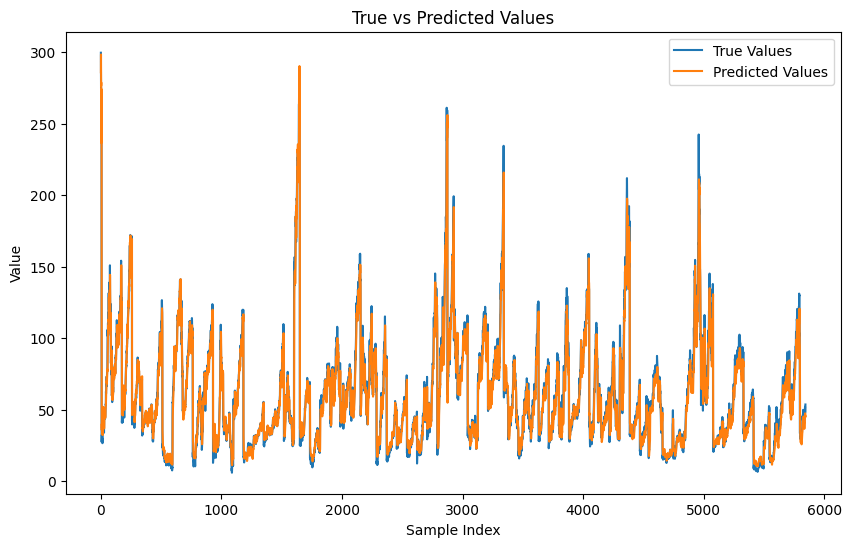

In [84]:
# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('True vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()



## Prediction price return and stock Movement is calculated, encode symbol are decode

In [123]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model

# Extract the encoded symbols from X_test
encoded_symbols = X_test[:, -1, -1]

# Convert encoded symbols to integers if necessary
encoded_symbols = encoded_symbols.astype(int)

# Map back to original symbols
try:
    symbols = [label_encoder.inverse_transform([symbol])[0] for symbol in encoded_symbols]
except ValueError as e:
    print(f"Error in inverse transform: {e}")

# Prepare DataFrame for results
df_results = pd.DataFrame({
    'Index': np.arange(len(y_test)),
    'Actual_Price': y_test.flatten(),
    'Predicted_Price': y_pred.flatten(),
    'Symbol': symbols
}).set_index('Index')


# Calculate returns using the formula
df_results['Predicted_Return'] = (df_results['Predicted_Price'] - df_results['Actual_Price'].shift(1)) / df_results['Actual_Price'].shift(1)

# Apply threshold to categorize movement direction
threshold = 0.0035
df_results['Movement_Direction'] = np.where(df_results['Predicted_Return'] > threshold, 'UP',
                                            np.where(df_results['Predicted_Return'] < -threshold, 'DOWN', 'NEUTRAL'))


df_results

,Actual_Price,Predicted_Price,Symbol,Predicted_Return,Movement_Direction
Index,,,,,
0,299.730011,286.064880,SHW,NaN,NEUTRAL
1,283.709991,298.497986,SHW,-0.004110,DOWN
2,276.660004,276.545807,SHW,-0.025252,DOWN
3,244.860001,278.980194,SHW,0.008386,UP
4,268.670013,236.526688,SHW,-0.034033,DOWN
...,...,...,...,...,...
5839,51.099998,43.861217,ZTS,-0.130945,DOWN
5840,52.009998,46.348347,ZTS,-0.092987,DOWN
5841,47.799999,47.344215,ZTS,-0.089709,DOWN


# LSTM Portfolio Contruction

In [125]:

# Filter stocks based on movement direction and predicted return
long_stocks = df_results[(df_results['Movement_Direction'] == 'UP') & (df_results['Predicted_Return'] > threshold)]

# Example total investment amount
total_investment = 1000

# Allocate funds proportionally based on predicted return
long_stocks['Allocation'] = (long_stocks['Predicted_Return'] / long_stocks['Predicted_Return'].sum()) * total_investment

# Build the portfolio
lstm_portfolio = long_stocks[['Symbol', 'Actual_Price', 'Predicted_Price', 'Allocation', 'Predicted_Return']]


# Simulate and evaluate portfolio performance
lstm_portfolio['Cumulative_Return'] = (1 + lstm_portfolio['Predicted_Return']).cumprod() - 1


<ipython-input-125-d0069b6e4aa6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_stocks['Allocation'] = (long_stocks['Predicted_Return'] / long_stocks['Predicted_Return'].sum()) * total_investment


In [126]:
lstm_portfolio

,Symbol,Actual_Price,Predicted_Price,Allocation,Predicted_Return,Cumulative_Return
Index,,,,,,
3,SHW,244.860001,278.980194,0.042492,0.008386,8.386431e-03
5,SHW,268.739990,274.284912,0.105889,0.020899,2.946057e-02
7,SIG,28.809999,35.608604,1.527543,0.301484,3.398265e-01
8,SIG,32.340000,39.991966,1.966546,0.388128,8.598507e-01
9,SIG,32.020000,37.059193,0.739361,0.145924,1.131248e+00
...,...,...,...,...,...,...
5553,YHOO,14.170000,15.019783,0.738092,0.145674,1.047387e+75
5554,YHOO,16.490000,14.239393,0.024813,0.004897,1.052516e+75
5798,ZTS,33.400002,40.657589,1.091749,0.215473,1.279305e+75


# Building GRU model to predict close price

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ParameterGrid
import numpy as np
import os

# Define the function to create the model
def create_model(optimizer='adam', learning_rate=0.001, input_shape=(1, 1)):
    model = Sequential()
    model.add(GRU(100, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(100))
    model.add(Dense(1))  # Output layer

    # Compile the model
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")

    model.compile(optimizer=opt, loss='mean_squared_error')
    return model

In [129]:
# Define parameter grid for hyperparameter tuning
gru_param_grid = {
    'optimizer': ['adam'],
    'learning_rate': [0.0001]
}

## Training of Gru

In [130]:
# Define the rolling window sizes
window_sizes = [1, 5, 10, 20, 30, 50, 60, 70]

# Path to save the best models
best_model_path = '/content/drive/MyDrive/samreen/gru_model'
data_path = '/content/drive/MyDrive/samreen'
os.makedirs(best_model_path, exist_ok=True)

# Iterate through each window size
for W in window_sizes:
    print(f"Processing window size: {W}")

    # Load the data
    X_train = np.load(os.path.join(data_path, f'X_train_W{W}.npy'))
    X_val = np.load(os.path.join(data_path, f'X_val_W{W}.npy'))
    X_test = np.load(os.path.join(data_path, f'X_test_W{W}.npy'))
    y_train = np.load(os.path.join(data_path, f'y_train_W{W}.npy'))
    y_val = np.load(os.path.join(data_path, f'y_val_W{W}.npy'))
    y_test = np.load(os.path.join(data_path, f'y_test_W{W}.npy'))

    # Define the number of features
    num_features = X_train.shape[2]
    input_shape = (X_train.shape[1], num_features)

    best_val_loss = float('inf')
    best_model = None
    best_params = None

    # Iterate through the parameter grid
    for params in ParameterGrid(gru_param_grid):
        optimizer = params['optimizer']
        learning_rate = params['learning_rate']

        # Build the model
        gru_model = create_model(
            optimizer=optimizer,
            learning_rate=learning_rate,
            input_shape=input_shape
        )

        # EarlyStopping callback
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )

        # Train the model
        history = gru_model.fit(
            X_train, y_train,
            epochs=200,
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping],
            verbose=1
        )

        # Get the validation loss of the best epoch
        val_loss = min(history.history['val_loss'])

        # Update the best model if the current one is better
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = gru_model
            best_params = params

    # Save the best model
    path = os.path.join(best_model_path, f'best_model_W{W}.h5')
    best_model.save(path)

    print(f"Best model for window size {W} saved with val_loss={best_val_loss}.")
    print(f"Best parameters: {best_params}")

    # Evaluate the best model on the test data
    test_loss = best_model.evaluate(X_test, y_test)
    print(f"Test loss for window size {W}: {test_loss}")
    print()


Processing window size: 1
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


585/585 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 11992.4648 - val_loss: 12236.1660
Epoch 2/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9912.5010 - val_loss: 11555.5713
Epoch 3/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9766.4658 - val_loss: 11046.0996
Epoch 4/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 10674.3037 - val_loss: 10625.9111
Epoch 5/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9380.2441 - val_loss: 10274.2441
Epoch 6/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9102.3633 - val_loss: 9983.4746
Epoch 7/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8298.9248 - val_loss: 9743.1904
Epoch 8/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8960.4404 - val_loss: 9552.3203
Epoch 9/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7669.0459 - val_loss: 9400.8701
Epoch 10/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8409.4482 - val_loss: 9290.0938
Epoch 11/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8026.7642 - 

Best model for window size 1 saved with val_loss=9061.8076171875.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1770.7495
Test loss for window size 1: 1604.151123046875

Processing window size: 5
Epoch 1/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 12149.4844 - val_loss: 12110.8379
Epoch 2/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 10016.1719 - val_loss: 11495.3242
Epoch 3/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 10150.5195 - val_loss: 10981.5244
Epoch 4/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9562.3838 - val_loss: 10543.4180
Epoch 5/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 10203.8291 - val_loss: 10170.8682
Epoch 6/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9380.4375 - val_loss: 9857.1445
Epoch 7/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8119.9146 - val_loss: 9594.3203
Epoch 8/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8368.8730 - val_

Best model for window size 5 saved with val_loss=1483.986083984375.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 166.6464
Test loss for window size 5: 117.83158111572266

Processing window size: 10
Epoch 1/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 12394.3281 - val_loss: 10093.1758
Epoch 2/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 11652.2090 - val_loss: 9503.3516
Epoch 3/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 10167.6650 - val_loss: 9009.8447
Epoch 4/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9914.6494 - val_loss: 8592.8691
Epoch 5/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9909.4160 - val_loss: 8239.5000
Epoch 6/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9913.9150 - val_loss: 7944.4731
Epoch 7/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9245.0859 - val_loss: 7702.1035
Epoch 8/200
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8731.3740 - val_lo

Best model for window size 10 saved with val_loss=1203.8306884765625.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 166.1823
Test loss for window size 10: 119.26026916503906

Processing window size: 20
Epoch 1/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 12710.6553 - val_loss: 11482.8086
Epoch 2/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 10448.9795 - val_loss: 10875.8496
Epoch 3/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 10027.7324 - val_loss: 10372.5332
Epoch 4/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9375.2207 - val_loss: 9945.4062
Epoch 5/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8652.7998 - val_loss: 9583.0762
Epoch 6/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8055.3286 - val_loss: 9279.2119
Epoch 7/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8413.2988 - val_loss: 9028.2949
Epoch 8/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8814.3867 - v

Best model for window size 20 saved with val_loss=1345.231201171875.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 163.2888
Test loss for window size 20: 131.98748779296875

Processing window size: 30
Epoch 1/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 12532.4951 - val_loss: 10141.1631
Epoch 2/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 11064.4795 - val_loss: 9557.5898
Epoch 3/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 9979.4990 - val_loss: 9070.6123
Epoch 4/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 10206.4541 - val_loss: 8659.3848
Epoch 5/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 8801.0537 - val_loss: 8311.2734
Epoch 6/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 8983.8672 - val_loss: 8021.6416
Epoch 7/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 8875.3584 - val_loss: 7786.1519
Epoch 8/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7897.0181 - val_

Best model for window size 30 saved with val_loss=994.6083374023438.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176.4913
Test loss for window size 30: 163.80096435546875

Processing window size: 50
Epoch 1/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 12402.3027 - val_loss: 10261.7803
Epoch 2/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 10809.3232 - val_loss: 9688.3936
Epoch 3/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 10560.3379 - val_loss: 9208.7314
Epoch 4/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 10315.5703 - val_loss: 8800.9971
Epoch 5/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 9299.0947 - val_loss: 8456.8096
Epoch 6/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 8309.9893 - val_loss: 8169.8423
Epoch 7/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 9199.1230 - val_loss: 7937.5332
Epoch 8/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 8505.9414 - va

Best model for window size 50 saved with val_loss=1324.9405517578125.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 107.0166
Test loss for window size 50: 117.19438934326172

Processing window size: 60
Epoch 1/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 12899.6768 - val_loss: 11082.0205
Epoch 2/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 11093.5039 - val_loss: 10493.8564
Epoch 3/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 10249.5752 - val_loss: 10000.2441
Epoch 4/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 9499.4971 - val_loss: 9583.6152
Epoch 5/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 9573.2842 - val_loss: 9232.0195
Epoch 6/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 9049.5439 - val_loss: 8938.8086
Epoch 7/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 9404.6660 - val_loss: 8698.5371
Epoch 8/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 9378.1377 - v

Best model for window size 60 saved with val_loss=1426.1358642578125.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 99.7762
Test loss for window size 60: 103.83642578125

Processing window size: 70
Epoch 1/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 12446.0859 - val_loss: 9959.7441
Epoch 2/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 10830.5596 - val_loss: 9378.8330
Epoch 3/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 10310.5674 - val_loss: 8893.1572
Epoch 4/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 10334.4375 - val_loss: 8484.0244
Epoch 5/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 10255.5029 - val_loss: 8138.6846
Epoch 6/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 8402.9043 - val_loss: 7849.3164
Epoch 7/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 9154.2490 - val_loss: 7612.8071
Epoch 8/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 8259.7207 - val_lo

Best model for window size 70 saved with val_loss=1006.4679565429688.
Best parameters: {'learning_rate': 0.0001, 'optimizer': 'adam'}
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 102.2725
Test loss for window size 70: 102.852294921875



## Load the save model to select the best one based on the matrics

In [7]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the rolling window sizes
window_sizes = [1, 5, 10, 20, 30, 50, 60, 70]

# Path to the saved models
best_model_path = '/content/drive/MyDrive/samreen/gru_model'
data_path = '/content/drive/MyDrive/samreen'

best_global_val_loss = float('inf')
best_global_model = None
best_global_window_size = None

# Iterate through each window size
for W in window_sizes:
    print(f"Evaluating model for window size: {W}")

    # Load the data
    X_test = np.load(os.path.join(data_path, f'X_test_W{W}.npy'))
    y_test = np.load(os.path.join(data_path, f'y_test_W{W}.npy'))

    # Load the model
    model_path = os.path.join(best_model_path, f'best_model_W{W}.h5')
    model = load_model(model_path)

    # Ensure the model is compiled with necessary metrics
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    # Evaluate the model on the test data
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Window size {W} -- Test MAE: {mae}, Test RMSE: {rmse}, Test R-squared: {r2}, Validation Loss: {loss}")

    if loss < best_global_val_loss:
        best_global_val_loss = loss
        best_global_model = model
        best_global_window_size = W

print(f"Best overall model found for window size {best_global_window_size}")
print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")
print(f"Test R-squared: {r2}")

# Save the best global model
gru_best_global_model_path = os.path.join(best_model_path, 'gru_best_global_model.h5')
best_global_model.save(gru_best_global_model_path)
print(f"Best global model saved to {gru_best_global_model_path}")


Evaluating model for window size: 1
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Window size 1 -- Test MAE: 1604.151123046875, Test RMSE: 40.0518535499998, Test R-squared: -0.11903032803882141, Validation Loss: 1604.151123046875
Evaluating model for window size: 5
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Window size 5 -- Test MAE: 117.8691635131836, Test RMSE: 10.856755069679739, Test R-squared: 0.9177763601017865, Validation Loss: 117.8691635131836
Evaluating model for window size: 10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


Window size 10 -- Test MAE: 119.2613525390625, Test RMSE: 10.92068497698852, Test R-squared: 0.9162495588925905, Validation Loss: 119.2613525390625
Evaluating model for window size: 20
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


Window size 20 -- Test MAE: 131.9333038330078, Test RMSE: 11.486223241352864, Test R-squared: 0.9062994008438932, Validation Loss: 131.9333038330078
Evaluating model for window size: 30
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Window size 30 -- Test MAE: 163.77734375, Test RMSE: 12.797553123953804, Test R-squared: 0.8826236173229547, Validation Loss: 163.77734375
Evaluating model for window size: 50


183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
Window size 50 -- Test MAE: 117.2287826538086, Test RMSE: 10.827223095864943, Test R-squared: 0.9155630573706836, Validation Loss: 117.2287826538086
Evaluating model for window size: 60


183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
Window size 60 -- Test MAE: 103.83876037597656, Test RMSE: 10.190131313818528, Test R-squared: 0.9252173417834622, Validation Loss: 103.83876037597656
Evaluating model for window size: 70


183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


Window size 70 -- Test MAE: 102.8245620727539, Test RMSE: 10.140242948113375, Test R-squared: 0.9259542164134664, Validation Loss: 102.8245620727539
Best overall model found for window size 70
Test MAE: 102.8245620727539
Test RMSE: 10.140242948113375
Test R-squared: 0.9259542164134664
Best global model saved to /content/drive/MyDrive/samreen/gru_model/gru_best_global_model.h5


## Based on the above result the best model is selected and loaded alone to continue portfolio construction

In [8]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Path to the best global model
gru_best_model_path = '/content/drive/MyDrive/samreen/gru_model/gru_best_global_model.h5'
data_path = '/content/drive/MyDrive/samreen'

# Best window size identified
gru_best_window = 70

# Load the best global model with custom objects
gru_best_global_model = load_model(gru_best_model_path, compile=False)

# Load the test data for the best window size
X_test = np.load(os.path.join(data_path, f'X_test_W{gru_best_window}.npy'))
y_test = np.load(os.path.join(data_path, f'y_test_W{gru_best_window}.npy'))

# Compile the model with necessary metrics
gru_best_global_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mean_squared_error'])

# Make predictions
gru_y_pred = gru_best_global_model.predict(X_test)

# Calculate error metrics
gru_mean_error = np.mean(y_test - gru_y_pred)
gru_mae = mean_absolute_error(y_test, gru_y_pred)
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_y_pred))
gru_r2 = r2_score(y_test, gru_y_pred)

print(f"Best global model window size: {gru_best_window}")
print(f"Mean Error: {gru_mean_error}")
print(f"Mean Absolute Error (MAE): {gru_mae}")
print(f"Root Mean Squared Error (RMSE): {gru_rmse}")
print(f"R-squared: {gru_r2}")


183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
Best global model window size: 70
Mean Error: 1.6477693826735873
Mean Absolute Error (MAE): 5.558793566030169
Root Mean Squared Error (RMSE): 10.140242948113375
R-squared: 0.9259542164134664


## Visualization of Actual vs Predicted prices

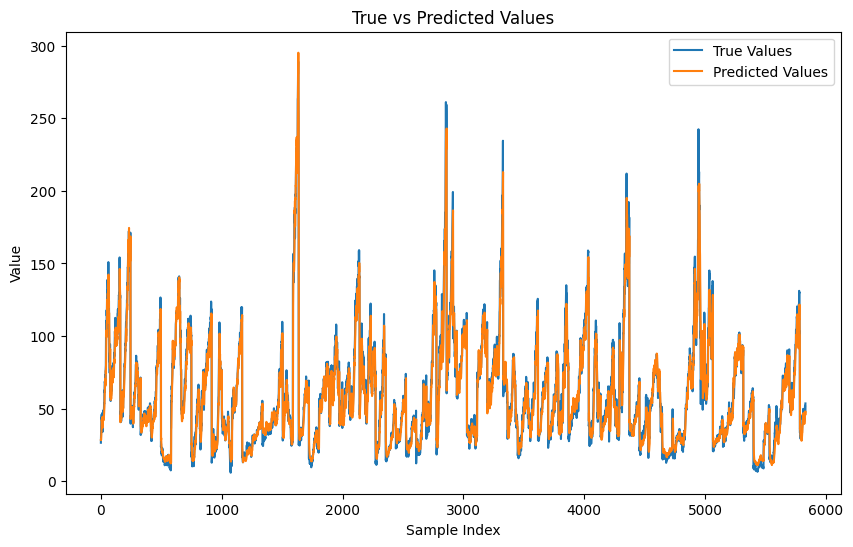

In [9]:
# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(gru_y_pred, label='Predicted Values')
plt.title('True vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()



## Prediction price return and stock Movement is calculated, encode symbol are decode

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model

# Extract the encoded symbols from X_test
encoded_symbols = X_test[:, -1, -1]

# Convert encoded symbols to integers if necessary
encoded_symbols = encoded_symbols.astype(int)

# Map back to original symbols
try:
    symbols = [label_encoder.inverse_transform([symbol])[0] for symbol in encoded_symbols]
except ValueError as e:
    print(f"Error in inverse transform: {e}")

# Prepare DataFrame for results
gru_df_results = pd.DataFrame({
    'Index': np.arange(len(y_test)),
    'Actual_Price': y_test.flatten(),
    'Predicted_Price': y_pred.flatten(),
    'Symbol': symbols
}).set_index('Index')


# Calculate returns using the formula
gru_df_results['Predicted_Return'] = (gru_df_results['Predicted_Price'] - gru_df_results['Actual_Price'].shift(1)) / gru_df_results['Actual_Price'].shift(1)

# Apply threshold to categorize movement direction
threshold = 0.0035
gru_df_results['Movement_Direction'] = np.where(gru_df_results['Predicted_Return'] > threshold, 'UP',
                                            np.where(gru_df_results['Predicted_Return'] < -threshold, 'DOWN', 'NEUTRAL'))


gru_df_results

,Actual_Price,Predicted_Price,Symbol,Predicted_Return,Movement_Direction
Index,,,,,
0,26.440001,28.460211,SIG,NaN,NEUTRAL
1,31.740000,28.590567,SIG,0.081338,UP
2,35.180000,28.408979,SIG,-0.104947,DOWN
3,39.830002,30.055986,SIG,-0.145651,DOWN
4,43.400002,31.908285,SIG,-0.198888,DOWN
...,...,...,...,...,...
5826,51.099998,45.651527,ZTS,-0.095472,DOWN
5827,52.009998,47.388153,ZTS,-0.072639,DOWN
5828,47.799999,48.041481,ZTS,-0.076303,DOWN


# GRU Portfolio Contruction

In [14]:

# Filter stocks based on movement direction and predicted return
gru_long_stocks = gru_df_results[(gru_df_results['Movement_Direction'] == 'UP') & (gru_df_results['Predicted_Return'] > threshold)]

# Example total investment amount
total_investment = 1000

# Allocate funds proportionally based on predicted return
gru_long_stocks['Allocation'] = (gru_long_stocks['Predicted_Return'] / gru_long_stocks['Predicted_Return'].sum()) * total_investment

# Build the portfolio
gru_portfolio = gru_long_stocks[['Symbol', 'Actual_Price', 'Predicted_Price', 'Allocation', 'Predicted_Return']]


# Simulate and evaluate portfolio performance
gru_portfolio['Cumulative_Return'] = (1 + gru_portfolio['Predicted_Return']).cumprod() - 1


<ipython-input-14-9122398979ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gru_long_stocks['Allocation'] = (gru_long_stocks['Predicted_Return'] / gru_long_stocks['Predicted_Return'].sum()) * total_investment


In [15]:
gru_portfolio

,Symbol,Actual_Price,Predicted_Price,Allocation,Predicted_Return,Cumulative_Return
Index,,,,,,
1,SIG,31.740000,28.590567,0.390710,0.081338,8.133758e-02
14,SIG,43.110001,36.688755,0.410542,0.085466,1.737553e-01
66,SIG,108.400002,117.075851,0.044551,0.009275,1.846414e-01
67,SIG,124.029999,109.310448,0.040345,0.008399,1.945912e-01
69,SIG,98.970001,109.223373,0.029353,0.006111,2.018909e-01
...,...,...,...,...,...,...
5788,ZTS,30.889999,34.002007,0.300524,0.062563,2.583169e+78
5789,ZTS,29.809999,31.565355,0.105021,0.021863,2.639645e+78
5790,ZTS,29.150000,30.947029,0.183220,0.038143,2.740328e+78


# Building XGBOOST for predicting close price and portfolio contruction

In [41]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Split data into features (X) and target (y)
X = df_monthly.drop(columns=[target])
y = df_monthly[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Set up hyperparameter grid for tuning
xg_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.001, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=xg_param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.001, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200, 500],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

## Best model parameters

In [24]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}


## training the xgb model again on the best parameter

In [42]:
# Train the final model with the best parameters
xg_best_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
xg_best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Save the best model

In [30]:
# import joblib

# # Save the best model
# joblib.dump(xg_best_model, '/content/drive/MyDrive/samreen/xgb_model/xg_best_model.pkl')

['/content/drive/MyDrive/samreen/xgb_model/xg_best_model.pkl']

## make prediction on the model and print the evaluation matrics

In [43]:
# Make predictions on the test set
xg_y_pred = xg_best_model.predict(X_test)

# Evaluate the model
xg_mse = mean_squared_error(y_test, xg_y_pred)
xg_mae = mean_absolute_error(y_test, xg_y_pred)
xg_rmse = mean_squared_error(y_test, xg_y_pred, squared=False)
xg_r2 = r2_score(y_test, xg_y_pred)
xg_me = np.mean(y_test - xg_y_pred)


print(f"Mean Error: {xg_me}")
print(f'Mean Squared Error (MSE): {xg_mse}')
print(f'Mean Absolute Error (MAE): {xg_mae}')
print(f'Root Mean Squared Error (RMSE): {xg_rmse}')
print(f'R-squared (R²): {xg_r2}')

Mean Error: 0.127101698388728
Mean Squared Error (MSE): 17.197513253872856
Mean Absolute Error (MAE): 1.7167096294161583
Root Mean Squared Error (RMSE): 4.146988455960886
R-squared (R²): 0.9974760362213838


## Calculate returns and movement

In [32]:
X_test

,open,low,high,volume,Earnings Before Interest and Tax,Net Income,Operating Income,Gross Profit,Profit Margin,Gross Margin,...,Stochastic,ROC,ATR,CCI,Williams %R,OBV,CMF,Ichimoku_A,Ichimoku_B,symbol_encoded
3378,0.064301,0.062579,0.061371,0.006566,0.140431,0.177187,0.143464,0.059896,0.273563,0.876607,...,0.799115,0.069626,0.044350,0.577132,0.799115,0.287160,0.524650,0.037340,0.069856,41
18094,0.077921,0.078350,0.076766,0.015461,0.135469,0.165916,0.137052,0.058416,0.133333,0.516710,...,0.487191,0.031810,0.050370,0.506687,0.487191,0.294818,0.410002,0.082695,0.085992,220
10628,0.022096,0.022073,0.021438,0.003470,0.086930,0.125748,0.088105,0.002062,0.128736,0.480720,...,0.825936,0.049057,0.018161,0.533987,0.825936,0.286221,0.616843,0.019551,0.024537,129
15458,0.028566,0.027020,0.026970,0.013391,0.111861,0.141302,0.113110,0.033459,0.075862,0.403599,...,0.543851,0.037135,0.030896,0.491233,0.543851,0.285523,0.639647,0.027430,0.031399,189
3115,0.053267,0.052329,0.050958,0.002693,0.093602,0.129007,0.095623,0.012105,0.108046,0.605827,...,0.720631,0.047898,0.000000,0.619592,0.720631,0.279378,0.530592,0.025629,0.076527,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7486,0.034976,0.033506,0.033576,0.009282,0.098143,0.132031,0.099408,0.022181,0.055172,0.323907,...,0.008460,0.024519,0.064186,0.369179,0.008460,0.309294,0.645685,0.056801,0.070450,91
17126,0.059524,0.056667,0.056309,0.036623,0.199255,0.223265,0.211534,0.079289,0.170115,0.370180,...,0.840973,0.039780,0.029183,0.567891,0.840973,0.312290,0.559337,0.018700,0.069544,209
18195,0.015699,0.015012,0.015307,0.016144,0.106978,0.147667,0.108934,0.013082,0.123372,0.204799,...,0.078117,0.022196,0.030539,0.381956,0.078117,0.287011,0.239301,0.021108,0.039061,221
2442,0.025601,0.021710,0.024039,0.005562,0.089364,0.126425,0.091578,0.009200,0.034483,0.249357,...,0.504722,0.030818,0.000000,0.472191,0.504722,0.280038,0.637112,0.023679,0.032965,30


In [34]:
# Extract the encoded symbols from X_test
encoded_symbols = X_test['symbol_encoded']

# Convert encoded symbols to integers if necessary
encoded_symbols = encoded_symbols.astype(int)

# Map back to original symbols
try:
    symbols = [label_encoder.inverse_transform([symbol])[0] for symbol in encoded_symbols]
except ValueError as e:
    print(f"Error in inverse transform: {e}")

# Prepare DataFrame for results
xg_df_results = pd.DataFrame({
    'Index': np.arange(len(y_test)),
    'Actual_Price': y_test,
    'Predicted_Price': xg_y_pred.flatten(),
    'Symbol': symbols
}).set_index('Index')


# Calculate returns using the formula
xg_df_results['Predicted_Return'] = (xg_df_results['Predicted_Price'] - xg_df_results['Actual_Price'].shift(1)) / xg_df_results['Actual_Price'].shift(1)

# Apply threshold to categorize movement direction
threshold = 0.0035
xg_df_results['Movement_Direction'] = np.where(xg_df_results['Predicted_Return'] > threshold, 'UP',
                                            np.where(xg_df_results['Predicted_Return'] < -threshold, 'DOWN', 'NEUTRAL'))


xg_df_results

,Actual_Price,Predicted_Price,Symbol,Predicted_Return,Movement_Direction
Index,,,,,
0,94.730003,94.548042,BIIB,NaN,NEUTRAL
1,116.980003,116.836182,MON,0.233360,UP
2,34.910000,35.420490,FLIR,-0.697209,DOWN
3,42.529999,41.421310,LB,0.186517,UP
4,77.529999,79.262955,BCR,0.863695,UP
...,...,...,...,...,...
5840,50.340000,48.337097,DLTR,-0.365238,DOWN
5841,87.820000,86.904861,MCD,0.726358,UP
5842,23.530001,22.691822,MOS,-0.741610,DOWN


## Make portfolio df

In [35]:
# Filter stocks based on movement direction and predicted return
xg_long_stocks = xg_df_results[(gru_df_results['Movement_Direction'] == 'UP') & (xg_df_results['Predicted_Return'] > threshold)]

# Example total investment amount
total_investment = 1000

# Allocate funds proportionally based on predicted return
xg_long_stocks['Allocation'] = (xg_long_stocks['Predicted_Return'] / xg_long_stocks['Predicted_Return'].sum()) * total_investment

# Build the portfolio
xg_portfolio = xg_long_stocks[['Symbol', 'Actual_Price', 'Predicted_Price', 'Allocation', 'Predicted_Return']]


# Simulate and evaluate portfolio performance
xg_portfolio['Cumulative_Return'] = (1 + xg_portfolio['Predicted_Return']).cumprod() - 1

xg_portfolio

<ipython-input-35-93796c1bae66>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xg_long_stocks['Allocation'] = (xg_long_stocks['Predicted_Return'] / xg_long_stocks['Predicted_Return'].sum()) * total_investment
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,Symbol,Actual_Price,Predicted_Price,Allocation,Predicted_Return,Cumulative_Return
Index,,,,,,
1,MON,116.980003,116.836182,0.149156,0.233360,2.333598e-01
66,BWA,62.250000,63.638283,0.426752,0.667670,1.056837e+00
69,RL,156.889999,160.208664,4.655553,7.283799,1.603842e+01
79,BIIB,117.949997,118.667435,0.128217,0.200601,1.945636e+01
164,NFX,32.560001,33.628365,0.200775,0.314121,2.588213e+01
...,...,...,...,...,...,...
5637,ORLY,216.240005,219.197281,2.257327,3.531678,5.438552e+284
5785,WMT,74.489998,75.967796,0.119759,0.187368,6.457562e+284
5786,XEC,116.129997,117.037422,0.365080,0.571183,1.014601e+285


# Comprision of the Three Models

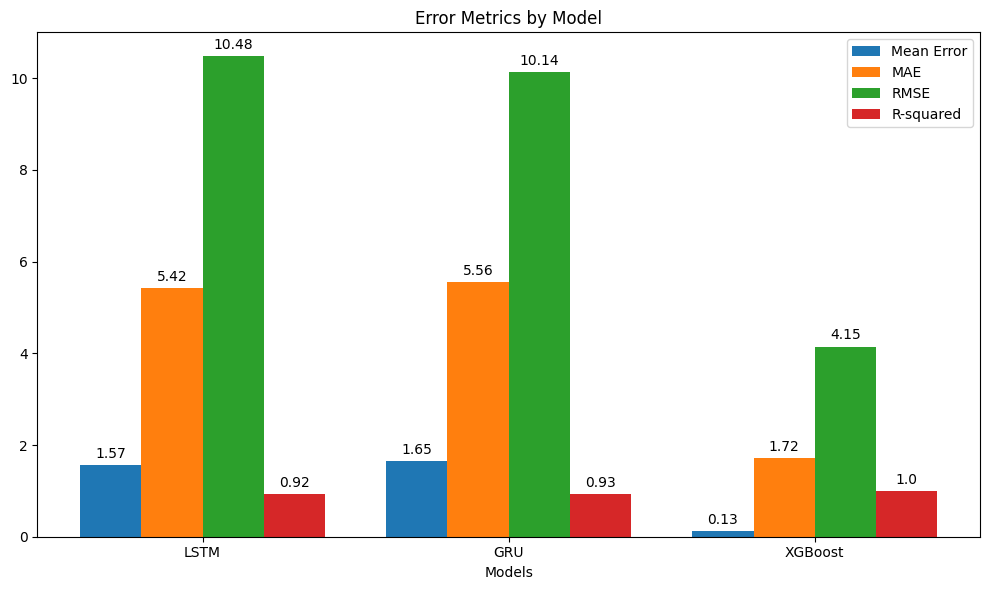

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Organize data for plotting
models = ['LSTM', 'GRU', 'XGBoost']
mean_errors = [lstm_mean_error, gru_mean_error, xg_me]
maes = [lstm_mae, gru_mae, xg_mae]
rmses = [lstm_rmse, gru_rmse, xg_rmse]
r2s = [lstm_r2, gru_r2, xg_r2]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5*width, mean_errors, width, label='Mean Error')
rects2 = ax.bar(x - 0.5*width, maes, width, label='MAE')
rects3 = ax.bar(x + 0.5*width, rmses, width, label='RMSE')
rects4 = ax.bar(x + 1.5*width, r2s, width, label='R-squared')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Error Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add labels to the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

fig.tight_layout()

plt.show()
